In [ ]:
print("oi")

# Install missing python modules

In [1]:
import sys
!{sys.executable} -m pip install skrebate

# Global imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from ReliefF import ReliefF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Pair plot of phenotype data (=discovering pairwise correlation)

In [3]:
# growth_df=pd.read_csv('growth_SV', delimiter=" ")
# #factorize sex and population to use in PP
# growth_df['sex'] = pd.factorize(growth_df.sex)[0]
# growth_df['population'] = pd.factorize(growth_df.population)[0]
# # Slicing out the phenotype data
# data=growth_df.iloc[:, 0:9]
# # Exclude indv from pairing, by putting it as index
# data=data.set_index('indv')
# # Sex 0 = male, sex 1 = unknown and sex 2 = female
# # pop 0 = 2013B12, pop 1 = 2013B11, pop 2 = 2013B9 and pop 3 = 2013B10
# sns.pairplot(data, hue="age", palette="tab10")

# Categorising fork_length


#### Load growth data for SV's

In [4]:
growth_df=pd.read_csv('SV_growth_50kb_1kb_5', delimiter=" ")  

In [5]:
growth_df

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
0,27033489,male,2013B12,268.211388,3,53.0,2.0,0.0,1.0,2,...,1,0,2,0,0,0,1,0,1,0
1,27033489,male,2013B12,162.068598,1,54.0,0.0,0.0,1.0,2,...,1,0,2,0,0,0,1,0,1,0
2,83800743,unknown,2013B11,162.617027,1,39.0,0.0,0.0,2.0,4,...,1,0,1,0,0,0,2,0,0,0
3,83800743,unknown,2013B11,264.152366,3,30.0,2.0,0.0,2.0,4,...,1,0,1,0,0,0,2,0,0,0
4,140942470,unknown,2013B9,156.474088,1,44.0,0.0,0.0,1.0,4,...,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,985661182,unknown,2013B9,149.724143,1,35.0,0.0,0.0,2.0,4,...,1,0,1,0,0,0,1,0,0,0
59,986994303,male,2013B12,250.116536,3,40.0,2.0,0.0,1.0,4,...,0,0,1,0,0,0,2,0,0,0
60,986994303,male,2013B12,148.071168,1,40.0,0.0,0.0,1.0,4,...,0,0,1,0,0,0,2,0,0,0
61,998916898,unknown,2013B9,168.723524,1,49.0,0.0,0.0,1.0,3,...,1,0,0,0,0,0,2,0,0,0


In [98]:
sex_df=growth_df.loc[(growth_df['sex'] == "male") | (growth_df['sex'] == "female")]
sex_df

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
0,27033489,male,2013B12,268.211388,3,53.0,2.0,0.0,1.0,2,...,1,0,2,0,0,0,1,0,1,0
1,27033489,male,2013B12,162.068598,1,54.0,0.0,0.0,1.0,2,...,1,0,2,0,0,0,1,0,1,0
13,261931510,male,2013B10,227.704511,3,24.0,2.0,0.0,2.0,3,...,1,0,2,0,0,0,1,0,0,0
14,261931510,male,2013B10,139.704581,1,34.0,0.0,0.0,2.0,3,...,1,0,2,0,0,0,1,0,0,0
15,262447031,male,2013B10,164.332852,1,58.0,0.0,0.0,2.0,4,...,1,0,2,0,0,0,1,0,0,0
16,262447031,male,2013B10,258.806908,3,59.0,2.0,0.0,2.0,4,...,1,0,2,0,0,0,1,0,0,0
17,275378212,male,2013B12,184.529064,1,36.0,0.0,0.0,2.0,1,...,0,0,2,0,0,0,1,0,0,0
18,275378212,male,2013B12,282.035539,3,38.0,2.0,0.0,2.0,1,...,0,0,2,0,0,0,1,0,0,0
21,299826357,female,2013B11,260.368211,3,59.0,2.0,0.0,1.0,1,...,0,0,3,0,0,0,0,0,1,0
22,299826357,female,2013B11,159.883841,1,64.0,0.0,0.0,1.0,1,...,0,0,3,0,0,0,0,0,1,0


#### Split data in year 1 and year 3 data

In [6]:
growth_y1 = growth_df.loc[(growth_df['age'] == 1)]
growth_y3 = growth_df.loc[(growth_df['age'] == 3)]

#### Bin into small --> medium --> big

##### Year 1

In [7]:
small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y1=small_medium.append(big)

<ipython-input-7-500e8c2916d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-7-500e8c2916d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-7-500e8c2916d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

##### Year 3

In [8]:
small=growth_y3.loc[(growth_y3['fork_length'] >= min(growth_y3.fork_length)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y3.loc[(growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.33)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y3.loc[growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y3=small_medium.append(big)

<ipython-input-8-3ebd253edfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-8-3ebd253edfbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-8-3ebd253edfbf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

# Do relief F feature selection

## Overview of target

In [9]:
print(binned_y1['fork_length'].value_counts())
print(binned_y3['fork_length'].value_counts())

big       11
small     11
medium    10
Name: fork_length, dtype: int64
big       11
small     10
medium    10
Name: fork_length, dtype: int64


In [93]:
y1_relief_top=[]
score_list=[]
for value in fs1.top_features_[0:500]:
    score=fs1.feature_importances_[value]
    score_list.append(score)
    y1_relief_top.append(reliefdict1[score])



# binned_y1=binned_y1.set_index('indv')
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
X = np.array(binned_y1[y1_relief_top])
y = np.array(binned_y1['fork_length'])


X

array([[1, 0, 1, ..., 0, 2, 4],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 2, 2],
       ...,
       [0, 1, 0, ..., 0, 1, 5],
       [0, 1, 0, ..., 0, 1, 3],
       [0, 1, 0, ..., 0, 1, 5]], dtype=int64)

In [94]:
# Import modules
import numpy as np
import pandas as pd
import pyswarms as ps
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')



from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=15, n_classes=3,
#                            n_informative=4, n_redundant=1, n_repeated=2,
#                            random_state=1)


# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = X.shape[1]
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

# Initialize swarm, arbitrary
options = {'c1': 0.1, 'c2': 0.1, 'w':0.9, 'k': 1, 'p':1}

# Call instance of PSO
dimensions = X.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=500, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=500)

iterator=0
PSO_list=[]
for value in pos:
    if value==1:
        PSO_list.append(y1_relief_top[iterator])
    iterator+=1
print(len(PSO_list))

x=binned_y1[PSO_list]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

clf = LogisticRegression(random_state=0, max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))




2020-11-16 16:16:27,920 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 0.1, 'c2': 0.1, 'w': 0.9, 'k': 1, 'p': 1}
pyswarms.discrete.binary: 100%|██████████████████████████████████████████████████████████████|500/500, best_cost=0.0406
2020-11-16 18:10:35,543 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.04055999999999999, best pos: [0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 

331
Logistic regression 1.0


In [95]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0, max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

KNN 0.5625
Naive Bayes 0.4375
Logistic regression 1.0
Random forest 0.75
SVM 1.0


In [38]:
iterator=0
PSO_list=[]
for value in pos:
    if value==1:
        PSO_list.append(y1_relief_top[iterator])
    iterator+=1
print(len(PSO_list))

291


In [39]:
x=binned_y1[PSO_list]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0, max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with TuRF Relief-F top 500 features and year 1 data ---

KNN 0.5
Naive Bayes 0.5
Logistic regression 0.875
Random forest 0.875
SVM 0.9375


## Start with year 1

In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
genetic_data=binned_y1
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs1 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs1.fit(features, labels, headers)
reliefdict1={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs1.feature_importances_):
    reliefdict1[feature_score]=feature_name

Created distance array in 0.621058464050293 seconds.
Feature scoring under way ...
Completed scoring in 121.38548493385315 seconds.
Created distance array in 0.3299574851989746 seconds.
Feature scoring under way ...
Completed scoring in 61.399550676345825 seconds.
Created distance array in 0.1770000457763672 seconds.
Feature scoring under way ...
Completed scoring in 39.347206354141235 seconds.


## Get top 25 scores year 1

In [1]:
import pylab as pl

# print(reliefdict)
y1_relief_top=[]
score_list=[]
for value in fs1.top_features_[0:10]:
    score=fs1.feature_importances_[value]
    score_list.append(score)
    y1_relief_top.append(reliefdict1[score])
    
# df = pd.DataFrame({'Features':y1_relief_top, 'Scores':score_list})
# ax = df.plot.bar(x='Features', y='Scores', rot=90)
# pl.suptitle("Year 1 top 25 feature scores")


NameError: name 'fs1' is not defined

## Get prediction year 1

In [64]:
def predict(value):
    y1_relief_top=[]
    for value in fs1.top_features_[0:value]:
        score=fs1.feature_importances_[value]
        y1_relief_top.append(reliefdict1[score])

    x=binned_y1[y1_relief_top]
    y = binned_y1.fork_length
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

    print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
    classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("KNN", accuracy_score(y_test, y_pred))


    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Naive Bayes", accuracy_score(y_test, y_pred))

    clf = LogisticRegression(random_state=0, max_iter=2000).fit(x_train, y_train)
    pred = clf.predict(x_test)
    print("Logistic regression", accuracy_score(y_test, pred))

    ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
    ranfor.fit(x_train, y_train)
    pred_ranfor = ranfor.predict(x_test)
    print("Random forest", accuracy_score(y_test, pred_ranfor))
    pred_ranfor

    sv = svm.SVC(kernel='linear')
    sv.fit(x_train, y_train)
    pred_svm = sv.predict(x_test)
    print("SVM",accuracy_score(y_test, pred_svm))

def main():
    nofeatures=[10, 50, 100, 200, 500]
    for value in nofeatures:
        predict(value)
main()

--- Classifiers with TuRF Relief-F top 10 features and year 1 data ---

KNN 0.875
Naive Bayes 1.0
Logistic regression 1.0
Random forest 0.75
SVM 0.6875
--- Classifiers with TuRF Relief-F top 50 features and year 1 data ---

KNN 0.6875
Naive Bayes 0.9375
Logistic regression 1.0
Random forest 1.0
SVM 1.0
--- Classifiers with TuRF Relief-F top 100 features and year 1 data ---

KNN 0.8125
Naive Bayes 0.6875
Logistic regression 0.9375
Random forest 1.0
SVM 1.0
--- Classifiers with TuRF Relief-F top 200 features and year 1 data ---

KNN 0.8125
Naive Bayes 0.5625
Logistic regression 1.0
Random forest 1.0
SVM 1.0
--- Classifiers with TuRF Relief-F top 500 features and year 1 data ---

KNN 0.625
Naive Bayes 0.5
Logistic regression 0.9375
Random forest 1.0
SVM 1.0


## Now do year 3

In [13]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
genetic_data=binned_y3
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs3 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs3.fit(features, labels, headers)
reliefdict3={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs3.feature_importances_):
    reliefdict3[feature_score]=feature_name

Created distance array in 0.743976354598999 seconds.
Feature scoring under way ...
Completed scoring in 148.7708396911621 seconds.
Created distance array in 0.43201136589050293 seconds.
Feature scoring under way ...
Completed scoring in 74.06866335868835 seconds.
Created distance array in 0.23000335693359375 seconds.
Feature scoring under way ...
Completed scoring in 38.271206855773926 seconds.


## Get top 25 year 3

['LG11_dels_31250000', 'LG3_dels_19750000', 'LG24_ins_10650000', 'LG23_dels_15600000', 'LG10_ins_16750000', 'LG14_dels_8550000', 'LG22_dels_18600000', 'LG14_ins_21900000', 'LG19_ins_9550000', 'LG8_dels_13300000', 'LG14_dels_27150000', 'LG9_dels_11550000', 'LG18_dels_30550000', 'LG7_ins_25200000', 'LG2_dels_14300000', 'LG3_dels_14250000', 'LG19_dups_25750000', 'LG19_ins_17800000', 'LG10_invs_2050000', 'LG6_ins_25050000', 'LG6_ins_25050000', 'LG5_dels_33200000', 'LG15_dels_12800000', 'LG14_dels_21900000', 'LG18_ins_28200000']


Text(0.5, 0.98, 'Year 3 top 25 feature scores')

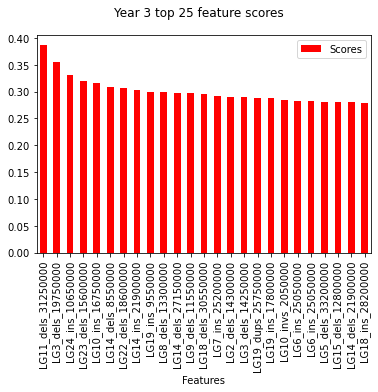

In [21]:
import pylab as pl

# print(reliefdict)
y3_relief_top=[]
score_list=[]
for value in fs3.top_features_[0:25]:
    score=fs3.feature_importances_[value]
    y3_relief_top.append(reliefdict3[score])
    score_list.append(score)
    
print(y3_relief_top)

df = pd.DataFrame({'Features':y3_relief_top, 'Scores':score_list})
ax = df.plot.bar(x='Features', y='Scores', rot=90, color="red")
pl.suptitle("Year 3 top 25 feature scores")

## Get prediction year 3

In [22]:
def pred(value):
    y3_relief_top=[]
    for value in fs3.top_features_[0:value]:
        score=fs3.feature_importances_[value]
        y3_relief_top.append(reliefdict3[score])
    x=binned_y3[y3_relief_top]
    y = binned_y3.fork_length
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

    print("--- Classifiers with TuRF Relief-F top",str(len(y3_relief_top)), "features and year 3 data ---\n")
    classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("KNN", accuracy_score(y_test, y_pred))

    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Naive Bayes", accuracy_score(y_test, y_pred))

    clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
    pred = clf.predict(x_test)
    print("Logistic regression", accuracy_score(y_test, pred))

    ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
    ranfor.fit(x_train, y_train)
    pred_ranfor = ranfor.predict(x_test)
    print("Random forest", accuracy_score(y_test, pred_ranfor))
    pred_ranfor

    sv = svm.SVC(kernel='linear')
    sv.fit(x_train, y_train)
    pred_svm = sv.predict(x_test)
    print("SVM",accuracy_score(y_test, pred_svm))
def main():
    nofeatures=[25, 50, 100, 200, 500]
    for value in nofeatures:
        pred(value)
main()

--- Classifiers with TuRF Relief-F top 25 features and year 3 data ---

KNN 0.5
Naive Bayes 0.8125
Logistic regression 0.8125
Random forest 0.9375
SVM 0.8125
--- Classifiers with TuRF Relief-F top 50 features and year 3 data ---

KNN 0.6875
Naive Bayes 0.875
Logistic regression 0.875
Random forest 0.9375
SVM 0.875
--- Classifiers with TuRF Relief-F top 100 features and year 3 data ---

KNN 0.9375
Naive Bayes 0.9375
Logistic regression 0.9375
Random forest 1.0
SVM 1.0
--- Classifiers with TuRF Relief-F top 200 features and year 3 data ---

KNN 0.9375
Naive Bayes 0.875
Logistic regression 1.0
Random forest 0.9375
SVM 1.0
--- Classifiers with TuRF Relief-F top 500 features and year 3 data ---

KNN 0.9375
Naive Bayes 0.6875
Logistic regression 1.0
Random forest 1.0
SVM 1.0


# Year 1 chi-square feature selection and prediction

In [16]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y1.fork_length
X = binned_y1.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varc1=str(featureScores.nlargest(26,'Score'))
varc1.split()
data_listc1=[]
for values in varc1.split():
    if "LG" in values:
        data_listc1.append(values)
x=X[data_listc1]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listc1)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 1 data ---

KNN 0.5625
Naive Bayes 0.8125
Logistic regression 0.75
Random forest 0.5625
SVM 0.75


# Year 3 chi-square feature selection and prediction

In [17]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varc3=str(featureScores.nlargest(26,'Score'))
varc3.split()
data_listc3=[]
for values in varc3.split():
    if "LG" in values:
        data_listc3.append(values)
x=X[data_listc3]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listc3)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 3 data ---

KNN 0.8125
Naive Bayes 0.75
Logistic regression 0.8125
Random forest 0.6875
SVM 0.8125


# Mutual information year 3

In [18]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varm3=str(featureScores.nlargest(26,'Score'))
varm3.split()
data_listm3=[]
for values in varm3.split():
    if "LG" in values:
        data_listm3.append(values)
x=X[data_listm3]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listm3)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 26 features and year 3 data ---

KNN 0.4375
Naive Bayes 0.625
Logistic regression 0.5
Random forest 0.6875
SVM 0.4375


# Mutual information year 1

In [19]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
varm1=str(featureScores.nlargest(26,'Score'))
varm1.split()
data_listm1=[]
for values in varm1.split():
    if "LG" in values:
        data_listm1.append(values)
x=X[data_listm1]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_listm1)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0,max_iter=2000).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 26 features and year 3 data ---

KNN 0.5625
Naive Bayes 0.5625
Logistic regression 0.625
Random forest 0.75
SVM 0.75


In [20]:
combined_list= [data_listc1, data_listc3, data_listm1, data_listm3, y1_relief_top, y3_relief_top]
combined_list_names= ["data_listc1", "data_listc3", "data_listm1", "data_listm3", "y1_relief_top", "y3_relief_top"]
count_list=[]

iterator=0
for separate_list in combined_list:
    for value in separate_list:
        for i in range(len(combined_list)-iterator):
            for list_against in combined_list[len(combined_list)-1-i]:
                if value in list_against:
                    if combined_list_names[iterator] != combined_list_names[len(combined_list)-1-i]:
                        print(value, combined_list_names[iterator], combined_list_names[len(combined_list)-1-i] )
    iterator+=1

LG5_ins_33600000 data_listc1 data_listc3
LG13_ins_17400000 data_listc1 y1_relief_top
LG1_ins_12250000 data_listc1 data_listc3
LG19_dups_25750000 data_listc1 y3_relief_top
LG19_dups_25750000 data_listc1 y1_relief_top
LG3_dels_19750000 data_listm1 y3_relief_top
LG15_dels_12800000 data_listm1 y3_relief_top
LG9_dels_11550000 data_listm3 y3_relief_top
LG19_dups_25750000 y1_relief_top y3_relief_top
